## Tabular Data with Pandas

> **Credit note**: A portion of this lab tutorial was motivated by the nice examples from https://github.com/guipsamora and University of Berkeley's [Data 100](https://github.com/DS-100/su19/) (Summer 2019 version) lecture notebooks.

> **Modified from Introduction to Data Science offered in Trimester 2020.**

Last week, we had our first attempt at using **Pandas**, a powerful Python library written for the purpose of data manipulation and analysis. This week, we revisit Pandas in a more detailed manner, particularly on some basic concepts in handling and accessing Dataframes, how to perform sorting and counting of values in the Dataframe and also grouping data based on selected criteria. 

OK, let's import some important packages that we may need later.

In [1]:
import numpy as np
import pandas as pd

### Preamble

First, let's learn a few interesting commands and functions in Python that could come in handy sometimes. The command `%whos` allows us to see what are the active variables loaded in the memory. 

In [2]:
pi = 3.142
twopi = 2*3.142
a_tray_of_pi = np.array([twopi, pi, twopi, pi], dtype='int64')  # dtype fixes the data type of choice

In [3]:
%whos

Variable       Type       Data/Info
-----------------------------------
a_tray_of_pi   ndarray    4: 4 elems, type `int64`, 32 bytes
np             module     <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd             module     <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
pi             float      3.142
twopi          float      6.284


Use `del` to delete variables of your choice:

In [4]:
del twopi

In [5]:
%whos

Variable       Type       Data/Info
-----------------------------------
a_tray_of_pi   ndarray    4: 4 elems, type `int64`, 32 bytes
np             module     <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd             module     <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
pi             float      3.142


You can also erase all variables from memory using another magic function `%reset`. *Magic* functions are exclusive to the IPython kernel (note: not Python) and they perform special functions that usually involve the IPython kernel or to interact with the operating system.

In [6]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


IPython's `%timeit` magic function is useful to perform speed benchmarking of Python codes. It runs an operation in $N$ number of loops for $T$ number of times, then takes the best of the $T$ rounds. It reports back how much time was consumed per loop. 

Let's create 30 million integers and put them into a list and dictionary.

In [7]:
biglist = []
bigdict = {}
for j in range(30000000):
    biglist.append(j)     # recall: this is how you add to a list
    bigdict[j]=j          # this is how you add to a dictionary

In [8]:
%timeit 9999999 in biglist

424 ms ± 22.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%timeit 9999999 in bigdict

152 ns ± 14.5 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


Which data structure is quicker to access?

<br />

To know the package versions, call the common method `__version__`:

In [10]:
import numpy as np
import pandas as pd

In [11]:
pd.__version__       # double underscore on both sides

'1.4.0'

In [12]:
np.__version__

'1.22.1'

### Working with tabular data

Let's use another dataset (something more substantial and informative than hospital locations) to put Pandas to some practice. The [Internet Movie DataBase (IMDB)](https://www.imdb.com/) is a treasure trove of all kinds of movies, which comes with a large range of metadata (year of release, actors, description) as well as critic ratings. The data which was taken from [**data.world**](https://data.world/studentoflife/imdb-top-250-lists-and-5000-or-so-data-records) has been provided. 

If you are using Colab, upload the file "IMDB_top250.csv" to the session.

To start, load the dataset using pandas' nifty `read_csv` function. It's a really powerful function which is also easy to use:

In [14]:
movies = pd.read_csv("IMDB_top250.csv")
movies

,Unnamed: 0,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,...,tomatoConsensus,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,tomatoURL,DVD,BoxOffice,Production,Website,Response
0,1,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/shawshank_rede...,27 Jan 1998,NaN,Columbia Pictures,NaN,True
1,2,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather/,09 Oct 2001,NaN,Paramount Pictures,http://www.thegodfather.com,True
2,3,The Godfather: Part II,1974,R,20 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather_part...,24 May 2005,NaN,Paramount Pictures,http://www.thegodfather.com/,True
3,4,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/the_dark_knight/,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,http://thedarkknight.warnerbros.com/,True
4,5,12 Angry Men,1957,APPROVED,01 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/1000013-12_ang...,06 Mar 2001,NaN,Criterion Collection,http://www.criterion.com/films/27871-12-angry-men,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,The Lost Weekend,1945,NOT RATED,01 Jan 1946,101 min,"Drama, Film-Noir",Billy Wilder,"Charles R. Jackson (from the novel by), Charle...","Ray Milland, Jane Wyman, Phillip Terry, Howard...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/lost_weekend/,06 Feb 2001,NaN,Paramount Pictures,NaN,True
246,247,Short Term 12,2013,R,23 Aug 2013,96 min,Drama,Destin Daniel Cretton,Destin Daniel Cretton,"Brie Larson, John Gallagher Jr., Stephanie Bea...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/short_term_12_...,14 Jan 2014,NaN,Cinedigm,http://shortterm12.com,True
247,248,His Girl Friday,1940,APPROVED,18 Jan 1940,92 min,"Comedy, Drama, Romance",Howard Hawks,"Charles Lederer (screen play), Ben Hecht (from...","Cary Grant, Rosalind Russell, Ralph Bellamy, G...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/his_girl_friday/,28 Dec 2004,NaN,Columbia Pictures,NaN,True
248,249,The Straight Story,1999,G,03 Nov 1999,112 min,"Biography, Drama",David Lynch,"John Roach, Mary Sweeney","Sissy Spacek, Jane Galloway Heitz, Joseph A. C...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/straight_story/,07 Nov 2000,NaN,Buena Vista Pictures,http://disney.go.com/DisneyPictures/straightst...,True


IPython displays the contents of the read dataframe in brief form. 

If you are using Jupyter Notebook, you will notice that there are a lot more columns not displayed here (double-check this with the data opened in spreadsheet). The three dots, "..." in the column name area shows that there are some column data suppressed from being shown. On Colab, all columns are displayed by default.

Commonly known properties such as `shape` and `size` still work 

**Tip**: Sometimes you can make a wild guess and still get the function or property correct! 

In [15]:
movies.shape

(250, 38)

In [16]:
movies.size

9500

In [17]:
movies.columns

Index(['Unnamed: 0', 'Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre',
       'Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards',
       'Poster', 'Ratings.Source', 'Ratings.Value', 'Metascore', 'imdbRating',
       'imdbVotes', 'imdbID', 'Type', 'tomatoMeter', 'tomatoImage',
       'tomatoRating', 'tomatoReviews', 'tomatoFresh', 'tomatoRotten',
       'tomatoConsensus', 'tomatoUserMeter', 'tomatoUserRating',
       'tomatoUserReviews', 'tomatoURL', 'DVD', 'BoxOffice', 'Production',
       'Website', 'Response'],
      dtype='object')

The function `describe` performs some statistical analysis over all numeric columns (noticed that the non-numeric values are left out). Note that this is can look really easy to use, but it can also be quite misleading if you do not know what's going on.


In [18]:
movies.describe()

,Unnamed: 0,Year,Metascore,imdbRating,tomatoMeter,tomatoImage,tomatoRating,tomatoReviews,tomatoFresh,tomatoRotten,tomatoConsensus,tomatoUserMeter,tomatoUserRating,tomatoUserReviews
count,250.000000,250.000000,177.000000,250.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,125.500000,1982.676000,80.045198,8.244000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,72.312977,24.809212,11.030340,0.245735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1921.000000,53.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,63.250000,1961.250000,72.000000,8.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,125.500000,1988.000000,81.000000,8.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,187.750000,2003.000000,89.000000,8.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,250.000000,2017.000000,100.000000,9.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For example, what is the "mean" of the Year column? Does it mean anything? What about the "mean" of the imdbRating column?

The `head` and `tail` command shows only a few lines near the top or bottom of the data. This is kinda useful if you only want a glimpse of the data and not show everything at once.

In [19]:
movies.head(7)   # first 7 rows

,Unnamed: 0,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,...,tomatoConsensus,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,tomatoURL,DVD,BoxOffice,Production,Website,Response
0,1,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/shawshank_rede...,27 Jan 1998,NaN,Columbia Pictures,NaN,True
1,2,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather/,09 Oct 2001,NaN,Paramount Pictures,http://www.thegodfather.com,True
2,3,The Godfather: Part II,1974,R,20 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather_part...,24 May 2005,NaN,Paramount Pictures,http://www.thegodfather.com/,True
3,4,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/the_dark_knight/,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,http://thedarkknight.warnerbros.com/,True
4,5,12 Angry Men,1957,APPROVED,01 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/1000013-12_ang...,06 Mar 2001,NaN,Criterion Collection,http://www.criterion.com/films/27871-12-angry-men,True
5,6,Schindler's List,1993,R,04 Feb 1994,195 min,"Biography, Drama, History",Steven Spielberg,"Thomas Keneally (book), Steven Zaillian (scree...","Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/schindlers_list/,09 Mar 2004,NaN,Universal Pictures,http://www.schindlerslist.com,True
6,7,The Lord of the Rings: The Return of the King,2003,PG-13,17 Dec 2003,201 min,"Adventure, Drama, Fantasy",Peter Jackson,"J.R.R. Tolkien (novel), Fran Walsh (screenplay...","Noel Appleby, Ali Astin, Sean Astin, David Aston",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/the_lord_of_th...,25 May 2004,"$364,000,000",New Line Cinema,http://www.lordoftherings.net/,True


In [20]:
movies.tail()  # 5 by default

,Unnamed: 0,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,...,tomatoConsensus,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,tomatoURL,DVD,BoxOffice,Production,Website,Response
245,246,The Lost Weekend,1945,NOT RATED,01 Jan 1946,101 min,"Drama, Film-Noir",Billy Wilder,"Charles R. Jackson (from the novel by), Charle...","Ray Milland, Jane Wyman, Phillip Terry, Howard...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/lost_weekend/,06 Feb 2001,NaN,Paramount Pictures,NaN,True
246,247,Short Term 12,2013,R,23 Aug 2013,96 min,Drama,Destin Daniel Cretton,Destin Daniel Cretton,"Brie Larson, John Gallagher Jr., Stephanie Bea...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/short_term_12_...,14 Jan 2014,NaN,Cinedigm,http://shortterm12.com,True
247,248,His Girl Friday,1940,APPROVED,18 Jan 1940,92 min,"Comedy, Drama, Romance",Howard Hawks,"Charles Lederer (screen play), Ben Hecht (from...","Cary Grant, Rosalind Russell, Ralph Bellamy, G...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/his_girl_friday/,28 Dec 2004,NaN,Columbia Pictures,NaN,True
248,249,The Straight Story,1999,G,03 Nov 1999,112 min,"Biography, Drama",David Lynch,"John Roach, Mary Sweeney","Sissy Spacek, Jane Galloway Heitz, Joseph A. C...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/straight_story/,07 Nov 2000,NaN,Buena Vista Pictures,http://disney.go.com/DisneyPictures/straightst...,True
249,250,Slumdog Millionaire,2008,R,25 Dec 2008,120 min,Drama,"Danny Boyle, Loveleen Tandan","Simon Beaufoy (screenplay), Vikas Swarup (novel)","Dev Patel, Saurabh Shukla, Anil Kapoor, Raj Zu...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/slumdog_millio...,31 Mar 2009,"$141,243,551",Fox Searchlight Pictures,http://www.foxsearchlight.com/slumdogmillionaire/,True


If you examine the data, it appears that the first column (which is unnamed) could be redundant if you already can have the index number. It is also some kind of rank number for the top 250 movies which have already been sorted based on imDBRating. However, if there's a tie in imDBRating, it is not clear what other criteria is used to sort thereafter. So, using this number as the rank is also not accurate. Let's drop that column.

In [21]:
movies.drop(columns=['Unnamed: 0'], inplace=True)

Many functions in pandas come with the flag `inplace` that has been set to False. This prevents you from making costly mistakes or errors. Setting `inplace=True` ensures that the change is made on the dataframe itself.

In [22]:
movies.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,tomatoConsensus,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,tomatoURL,DVD,BoxOffice,Production,Website,Response
0,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/shawshank_rede...,27 Jan 1998,NaN,Columbia Pictures,NaN,True
1,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather/,09 Oct 2001,NaN,Paramount Pictures,http://www.thegodfather.com,True
2,The Godfather: Part II,1974,R,20 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather_part...,24 May 2005,NaN,Paramount Pictures,http://www.thegodfather.com/,True
3,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker emerges fro...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/the_dark_knight/,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,http://thedarkknight.warnerbros.com/,True
4,12 Angry Men,1957,APPROVED,01 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/1000013-12_ang...,06 Mar 2001,NaN,Criterion Collection,http://www.criterion.com/films/27871-12-angry-men,True


To change the index of the the dataframe to the imdbID (ID of the movie entry), you can either re-read the entire dataset:

In [23]:
movies2 = pd.read_csv("IMDB_top250.csv", index_col="imdbID")
movies2.head()

,Unnamed: 0,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,...,tomatoConsensus,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,tomatoURL,DVD,BoxOffice,Production,Website,Response
imdbID,,,,,,,,,,,,,,,,,,,,,
tt0111161,1,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/shawshank_rede...,27 Jan 1998,NaN,Columbia Pictures,NaN,True
tt0068646,2,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather/,09 Oct 2001,NaN,Paramount Pictures,http://www.thegodfather.com,True
tt0071562,3,The Godfather: Part II,1974,R,20 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather_part...,24 May 2005,NaN,Paramount Pictures,http://www.thegodfather.com/,True
tt0468569,4,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/the_dark_knight/,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,http://thedarkknight.warnerbros.com/,True
tt0050083,5,12 Angry Men,1957,APPROVED,01 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/1000013-12_ang...,06 Mar 2001,NaN,Criterion Collection,http://www.criterion.com/films/27871-12-angry-men,True


Or, you can just use `set_index` anytime, if you had already read the data earlier

In [24]:
movies3 = movies.set_index("imdbID")
movies3.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,tomatoConsensus,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,tomatoURL,DVD,BoxOffice,Production,Website,Response
imdbID,,,,,,,,,,,,,,,,,,,,,
tt0111161,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/shawshank_rede...,27 Jan 1998,NaN,Columbia Pictures,NaN,True
tt0068646,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather/,09 Oct 2001,NaN,Paramount Pictures,http://www.thegodfather.com,True
tt0071562,The Godfather: Part II,1974,R,20 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather_part...,24 May 2005,NaN,Paramount Pictures,http://www.thegodfather.com/,True
tt0468569,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker emerges fro...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/the_dark_knight/,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,http://thedarkknight.warnerbros.com/,True
tt0050083,12 Angry Men,1957,APPROVED,01 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/1000013-12_ang...,06 Mar 2001,NaN,Criterion Collection,http://www.criterion.com/films/27871-12-angry-men,True


The original dataframe `movies` did not change because `inplace` was not set to True. So, we have modified the index in the new dataframe `movies3`.

In [25]:
movies.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,tomatoConsensus,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,tomatoURL,DVD,BoxOffice,Production,Website,Response
0,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/shawshank_rede...,27 Jan 1998,NaN,Columbia Pictures,NaN,True
1,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather/,09 Oct 2001,NaN,Paramount Pictures,http://www.thegodfather.com,True
2,The Godfather: Part II,1974,R,20 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather_part...,24 May 2005,NaN,Paramount Pictures,http://www.thegodfather.com/,True
3,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker emerges fro...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/the_dark_knight/,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,http://thedarkknight.warnerbros.com/,True
4,12 Angry Men,1957,APPROVED,01 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/1000013-12_ang...,06 Mar 2001,NaN,Criterion Collection,http://www.criterion.com/films/27871-12-angry-men,True


In [26]:
movies3.index

Index(['tt0111161', 'tt0068646', 'tt0071562', 'tt0468569', 'tt0050083',
       'tt0108052', 'tt0167260', 'tt0110912', 'tt0137523', 'tt0120737',
       ...
       'tt1431045', 'tt0065214', 'tt0103639', 'tt0319061', 'tt0066206',
       'tt0037884', 'tt2370248', 'tt0032599', 'tt0166896', 'tt1010048'],
      dtype='object', name='imdbID', length=250)

Indices can have names. Since the new index for `movies3` came from an existing column read earlier, the index now has a name.

In [27]:
movies3.index.name

'imdbID'

> **Note**: Column names must be unique. If we try to read in a file for which the column names are not unique, Pandas will automatically remove any duplicates.

### Dataframe indexing

The DataFrame class has an indexing operator [] that lets you do a variety of different things. If your provide a String to the [] operator, you get back a Series corresponding to the requested label.

In [28]:
movies["Title"].head(6)

0    The Shawshank Redemption
1               The Godfather
2      The Godfather: Part II
3             The Dark Knight
4                12 Angry Men
5            Schindler's List
Name: Title, dtype: object

If you want the data to be retained in a Dataframe form instead of Series, add the `to_frame()` function:

In [29]:
movies["Title"].head(6).to_frame()

,Title
0,The Shawshank Redemption
1,The Godfather
2,The Godfather: Part II
3,The Dark Knight
4,12 Angry Men
5,Schindler's List


If you want the movie titles in an array, you can use the property `values` which extracts out the exact value in that column, without all the dataframe frills like indices or other information like Name and dtype.

In [30]:
movies["Title"].values

array(['The Shawshank Redemption', 'The Godfather',
       'The Godfather: Part II', 'The Dark Knight', '12 Angry Men',
       "Schindler's List",
       'The Lord of the Rings: The Return of the King', 'Pulp Fiction',
       'Fight Club', 'The Lord of the Rings: The Fellowship of the Ring',
       'Forrest Gump', 'Star Wars: Episode V - The Empire Strikes Back',
       'Inception', 'The Lord of the Rings: The Two Towers',
       "One Flew Over the Cuckoo's Nest", 'Goodfellas', 'The Matrix',
       'Star Wars: Episode IV - A New Hope', 'Se7en',
       "It's a Wonderful Life", 'The Silence of the Lambs',
       'The Usual Suspects', 'Léon: The Professional',
       'Saving Private Ryan', 'City Lights', 'Interstellar',
       'American History X', 'Modern Times', 'Casablanca',
       'The Green Mile', 'Psycho', 'Raiders of the Lost Ark',
       'The Pianist', 'Rear Window', 'The Departed', 'Whiplash',
       'Terminator 2: Judgment Day', 'Back to the Future', 'Gladiator',
       'The Lio

The [] operator also accepts a list of Strings which in that case, you will be getting back a dataframe containing the columns that you specify:

In [31]:
movies[["Title","imdbRating"]]

,Title,imdbRating
0,The Shawshank Redemption,9.3
1,The Godfather,9.2
2,The Godfather: Part II,9.0
3,The Dark Knight,9.0
4,12 Angry Men,8.9
...,...,...
245,The Lost Weekend,8.0
246,Short Term 12,8.0
247,His Girl Friday,8.0
248,The Straight Story,8.0


Print it again with the `values` property. Notice how the multi-column data is now organized in the array...

In [32]:
movies[["Title","imdbRating"]].values

array([['The Shawshank Redemption', 9.3],
       ['The Godfather', 9.2],
       ['The Godfather: Part II', 9.0],
       ['The Dark Knight', 9.0],
       ['12 Angry Men', 8.9],
       ["Schindler's List", 8.9],
       ['The Lord of the Rings: The Return of the King', 8.9],
       ['Pulp Fiction', 8.9],
       ['Fight Club', 8.8],
       ['The Lord of the Rings: The Fellowship of the Ring', 8.8],
       ['Forrest Gump', 8.8],
       ['Star Wars: Episode V - The Empire Strikes Back', 8.8],
       ['Inception', 8.8],
       ['The Lord of the Rings: The Two Towers', 8.7],
       ["One Flew Over the Cuckoo's Nest", 8.7],
       ['Goodfellas', 8.7],
       ['The Matrix', 8.7],
       ['Star Wars: Episode IV - A New Hope', 8.7],
       ['Se7en', 8.6],
       ["It's a Wonderful Life", 8.6],
       ['The Silence of the Lambs', 8.6],
       ['The Usual Suspects', 8.6],
       ['Léon: The Professional', 8.6],
       ['Saving Private Ryan', 8.6],
       ['City Lights', 8.6],
       ['Interstellar',

The [] operator also accepts numerical slices as arguments. In this case, we are indexing by row, not column!

In [33]:
movies[0:3]

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,tomatoConsensus,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,tomatoURL,DVD,BoxOffice,Production,Website,Response
0,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/shawshank_rede...,27 Jan 1998,NaN,Columbia Pictures,NaN,True
1,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather/,09 Oct 2001,NaN,Paramount Pictures,http://www.thegodfather.com,True
2,The Godfather: Part II,1974,R,20 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather_part...,24 May 2005,NaN,Paramount Pictures,http://www.thegodfather.com/,True


An interesting behavior happens if you try to give it a single integer index instead of a slice. It doesn't work because it tries to use it like a name instead...

### Accessing cells with loc and iloc

To access cells, the function `loc` is most handy. 

You can access a particular row by name (that is, by the index). So, using `movies3` which we had replaced the original index with the imdbID, we can now extract based on these IDs.

In [36]:
movies3.loc["tt0068646"]

Title                                                    The Godfather
Year                                                              1972
Rated                                                                R
Released                                                   24 Mar 1972
Runtime                                                        175 min
Genre                                                     Crime, Drama
Director                                          Francis Ford Coppola
Writer               Mario Puzo (screenplay), Francis Ford Coppola ...
Actors               Marlon Brando, Al Pacino, James Caan, Richard ...
Plot                 The aging patriarch of an organized crime dyna...
Language                                       English, Italian, Latin
Country                                                            USA
Awards                 Won 3 Oscars. Another 23 wins & 27 nominations.
Poster               https://images-na.ssl-images-amazon.com/images...
Rating

In [37]:
movies.loc[1]

Title                                                    The Godfather
Year                                                              1972
Rated                                                                R
Released                                                   24 Mar 1972
Runtime                                                        175 min
Genre                                                     Crime, Drama
Director                                          Francis Ford Coppola
Writer               Mario Puzo (screenplay), Francis Ford Coppola ...
Actors               Marlon Brando, Al Pacino, James Caan, Richard ...
Plot                 The aging patriarch of an organized crime dyna...
Language                                       English, Italian, Latin
Country                                                            USA
Awards                 Won 3 Oscars. Another 23 wins & 27 nominations.
Poster               https://images-na.ssl-images-amazon.com/images...
Rating

`loc` also supports slicing (for all types, including numerics and string labels!). Note that slicing for `loc` is inclusive even for numeric slices. 

In [38]:
movies.loc[0:4, 'Title':'Director']

,Title,Year,Rated,Released,Runtime,Genre,Director
0,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont
1,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola
2,The Godfather: Part II,1974,R,20 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola
3,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan
4,12 Angry Men,1957,APPROVED,01 Apr 1957,96 min,"Crime, Drama",Sidney Lumet


You can make specific row or column selections, by doing it in a list way.

In [39]:
movies.loc[[0, 1, 2, 3, 4], ['Title','Year', 'Runtime']]

,Title,Year,Runtime
0,The Shawshank Redemption,1994,142 min
1,The Godfather,1972,175 min
2,The Godfather: Part II,1974,202 min
3,The Dark Knight,2008,152 min
4,12 Angry Men,1957,96 min


If we provide only a single label for the row or column argument, we get back a Series.

In [40]:
movies.loc[0:4, "Title"]

0    The Shawshank Redemption
1               The Godfather
2      The Godfather: Part II
3             The Dark Knight
4                12 Angry Men
Name: Title, dtype: object

In [41]:
movies.loc[4, "Title":"Runtime"]

Title       12 Angry Men
Year                1957
Rated           APPROVED
Released     01 Apr 1957
Runtime           96 min
Name: 4, dtype: object

`iloc` is very similar, but it is used to access *numerical positions* instead of label names. So this is similar to what we are familiar with when accessing arrays. For example, to access to the top 3 rows and top 3 columns of a table, we can use [0:3, 0:3]. `iloc` slicing is therefore exclusive, just like standard Python slicing of numerical values.

In [42]:
movies.iloc[0:3, 0:3]

,Title,Year,Rated
0,The Shawshank Redemption,1994,R
1,The Godfather,1972,R
2,The Godfather: Part II,1974,R


This could be more intuitive at a glance, but generally, `loc` is preferred for a number of reasons:
1. It is harder to make mistakes since you have to literally write out what you want to get.
2. Code is easier to read, because the reader doesn't have to know e.g. what column #31 represents.
3. It is robust against permutations of the data, e.g. the order of two columns are switched at the data source.

However, if necessary, using `iloc` is OK as well.

### "Filters" with Boolean indexing

Just like arrays, Boolean indexing is also possible. In fact, they can be quite powerful as boolean values can be generated using expressions that evaluate to True/False. In this sense, we are creating "filters", which can be used to extract only specific data (rows) that fulfills the criteria set.

Let's create a filter, which we want to obtain movies that were released later than year 2010.

In [43]:
movies["Year"] > 2010

0      False
1      False
2      False
3      False
4      False
       ...  
245    False
246     True
247    False
248    False
249    False
Name: Year, Length: 250, dtype: bool

In [65]:
movies[movies["Year"] > 2010].Title

25                                     Interstellar
35                                         Whiplash
48                                 Django Unchained
51                            The Dark Knight Rises
76                                      Baby Driver
103                                      Inside Out
105                                            Room
106                                      La La Land
107                                           Logan
113                                         Warrior
115                         The Wolf of Wall Street
117                                   Hacksaw Ridge
137                                       Gone Girl
142                                            Rush
145                                 Song of the Sea
153                                       Spotlight
157                                12 Years a Slave
158                        The Grand Budapest Hotel
159                              Mad Max: Fury Road
165         

We can pass this filter as a list of indices (or a slice if you wish) of the DataFrame.

In [66]:
filter1 = movies["Year"] > 2010
movies[filter1]

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,tomatoConsensus,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,tomatoURL,DVD,BoxOffice,Production,Website,Response
25,Interstellar,2014,PG-13,07 Nov 2014,169 min,"Adventure, Drama, Sci-Fi",Christopher Nolan,"Jonathan Nolan, Christopher Nolan","Ellen Burstyn, Matthew McConaughey, Mackenzie ...",A team of explorers travel through a wormhole ...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/interstellar_2...,31 Mar 2015,"$158,737,441",Paramount Pictures,http://www.InterstellarMovie.com/,True
35,Whiplash,2014,R,15 Oct 2014,107 min,"Drama, Music",Damien Chazelle,Damien Chazelle,"Miles Teller, J.K. Simmons, Paul Reiser, Melis...",A promising young drummer enrolls at a cut-thr...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/whiplash_2014/,24 Feb 2015,NaN,Sony Pictures Classics,http://sonyclassics.com/whiplash/,True
48,Django Unchained,2012,R,25 Dec 2012,165 min,"Drama, Western",Quentin Tarantino,Quentin Tarantino,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...","With the help of a German bounty hunter , a fr...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/django_unchain...,16 Apr 2013,"$162,804,648",The Weinstein Co.,http://unchainedmovie.com/,True
51,The Dark Knight Rises,2012,PG-13,20 Jul 2012,164 min,"Action, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Gary Oldman, Tom Hardy, Joseph...",Eight years after the Joker's reign of anarchy...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/the_dark_knigh...,03 Dec 2012,"$448,130,642",Warner Bros. Pictures,http://www.thedarkknightrises.com/,True
76,Baby Driver,2017,R,28 Jun 2017,113 min,"Action, Crime, Music",Edgar Wright,Edgar Wright,"Ansel Elgort, Jon Bernthal, Jon Hamm, Eiza Gon...",After being coerced into working for a crime b...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/baby_driver/,NaN,"$30,029,105",Sony Pictures,http://www.babydriver-movie.com/,True
103,Inside Out,2015,PG,19 Jun 2015,95 min,"Animation, Adventure, Comedy","Pete Docter, Ronnie Del Carmen","Pete Docter (original story by), Ronnie Del Ca...","Amy Poehler, Phyllis Smith, Richard Kind, Bill...",After young Riley is uprooted from her Midwest...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/inside_out_2015/,03 Nov 2015,"$264,317,903",Disney/Pixar,https://www.facebook.com/PixarInsideOut,True
105,Room,2015,R,22 Jan 2016,118 min,Drama,Lenny Abrahamson,"Emma Donoghue (screenplay), Emma Donoghue (novel)","Brie Larson, Jacob Tremblay, Sean Bridgers, We...",A young boy is raised within the confines of a...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/room_2015/,01 Mar 2016,"$14,677,654",Element Pictures,http://www.lahabitacion.com.ar/,True
106,La La Land,2016,PG-13,25 Dec 2016,128 min,"Comedy, Drama, Music",Damien Chazelle,Damien Chazelle,"Ryan Gosling, Emma Stone, Amiée Conn, Terry Wa...",A jazz pianist falls for an aspiring actress i...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/la_la_land/,25 Apr 2017,"$151,058,124",Liongate Films,http://www.lalaland.movie/,True
107,Logan,2017,R,03 Mar 2017,137 min,"Action, Drama, Sci-Fi",James Mangold,"James Mangold (story by), Scott Frank (screenp...","Hugh Jackman, Patrick Stewart, Dafne Keen, Boy...","In the near future, a weary Logan cares for an...",...,NaN,NaN,NaN,NaN,https://www.rottentomatoes.com/m/logan_2017,23 May 2017,"$226,252,579",20th Century Fox,http://www.foxmovies.com/movies/logan,True
113,Warrior,2011,PG-13,09 Sep 2011,140 min,"Action, Drama, Sport",Gavin O'Connor,"Gavin O'Connor (screenplay), Anthony Tambakis ...","Joel Edgerton, Tom Hardy, Nick Nolte, Jennifer...",The youngest son of an alcoholic former boxer ...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/1212910-warrior/,20 Dec 2011,"$13,600,000",Lionsgate,http://www.WarriorFilm.com,True


**Q1**: Which movie of the Drama genre, released after 2010, managed to obtain a rating of more than 8.5 on IMDB? 

In [70]:
# first solution
filter2 = movies[(movies["Year"] > 2010) & (movies["imdbRating"] > 8.5)]
filter2

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,tomatoConsensus,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,tomatoURL,DVD,BoxOffice,Production,Website,Response
25,Interstellar,2014,PG-13,07 Nov 2014,169 min,"Adventure, Drama, Sci-Fi",Christopher Nolan,"Jonathan Nolan, Christopher Nolan","Ellen Burstyn, Matthew McConaughey, Mackenzie ...",A team of explorers travel through a wormhole ...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/interstellar_2...,31 Mar 2015,"$158,737,441",Paramount Pictures,http://www.InterstellarMovie.com/,True


In [52]:
# second solution
movies.loc[(movies["Year"] > 2010) & (movies["imdbRating"] > 8.5), ["Title","Genre"]]

,Title,Genre
25,Interstellar,"Adventure, Drama, Sci-Fi"


### Sorting data

Sorting data is one of the most meaningful things that we need do when it comes to data. Without sorting, it may be difficult to perform ranking on the data (or specific columns of the data) and a whole lot of other tasks.

Let's now create a copy of the Dataframe sorted by a specific column using `sort_values` function.

In [54]:
movies.sort_values('Year')

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,tomatoConsensus,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,tomatoURL,DVD,BoxOffice,Production,Website,Response
65,The Kid,1921,NOT RATED,06 Feb 1921,68 min,"Comedy, Drama, Family",Charles Chaplin,Charles Chaplin,"Carl Miller, Edna Purviance, Jackie Coogan, Ch...","The Tramp cares for an abandoned child, but ev...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/1052609-kid/,02 Mar 2004,NaN,First National Pictures Inc.,NaN,True
98,The Gold Rush,1925,NOT RATED,NaN,95 min,"Adventure, Comedy, Drama",Charles Chaplin,Charles Chaplin,"Charles Chaplin, Mack Swain, Tom Murray, Henry...",A prospector goes to the Klondike in search of...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/the-gold-rush/,16 May 2000,NaN,Janus Films,NaN,True
102,The General,1926,UNRATED,24 Feb 1927,67 min,"Action, Adventure, Comedy","Clyde Bruckman, Buster Keaton","Buster Keaton, Clyde Bruckman, Al Boasberg (ad...","Buster Keaton, Marion Mack, Glen Cavender, Jim...",When Union spies steal an engineer's beloved l...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/1008166-general/,26 Oct 1999,NaN,United Artists Films,NaN,True
195,All Quiet on the Western Front,1930,UNRATED,24 Aug 1930,136 min,"Drama, War",Lewis Milestone,"Erich Maria Remarque (by), Maxwell Anderson (a...","Louis Wolheim, Lew Ayres, John Wray, Arnold Lucy",A young soldier faces profound disillusionment...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/1000642-all_qu...,05 Jan 1999,NaN,Universal Pictures,NaN,True
24,City Lights,1931,G,07 Mar 1931,87 min,"Comedy, Drama, Romance",Charles Chaplin,Charles Chaplin,"Virginia Cherrill, Florence Lee, Harry Myers, ...","With the aid of a wealthy erratic tippler, a d...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/city_lights/,08 Feb 2000,NaN,Twentieth Century Fox Home Entertainment,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Hacksaw Ridge,2016,R,04 Nov 2016,139 min,"Biography, Drama, History",Mel Gibson,"Robert Schenkkan (screenplay), Andrew Knight (...","Andrew Garfield, Richard Pyros, Jacob Warner, ...","WWII American Army Medic Desmond T. Doss, who ...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/hacksaw_ridge/,21 Feb 2017,"$67,115,062",Summit Entertainment,http://www.hacksawridge.movie/,True
76,Baby Driver,2017,R,28 Jun 2017,113 min,"Action, Crime, Music",Edgar Wright,Edgar Wright,"Ansel Elgort, Jon Bernthal, Jon Hamm, Eiza Gon...",After being coerced into working for a crime b...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/baby_driver/,NaN,"$30,029,105",Sony Pictures,http://www.babydriver-movie.com/,True
107,Logan,2017,R,03 Mar 2017,137 min,"Action, Drama, Sci-Fi",James Mangold,"James Mangold (story by), Scott Frank (screenp...","Hugh Jackman, Patrick Stewart, Dafne Keen, Boy...","In the near future, a weary Logan cares for an...",...,NaN,NaN,NaN,NaN,https://www.rottentomatoes.com/m/logan_2017,23 May 2017,"$226,252,579",20th Century Fox,http://www.foxmovies.com/movies/logan,True
203,Guardians of the Galaxy Vol. 2,2017,PG-13,05 May 2017,136 min,"Action, Adventure, Sci-Fi",James Gunn,"James Gunn, Dan Abnett (based on the Marvel co...","Chris Pratt, Zoe Saldana, Dave Bautista, Vin D...",The Guardians must fight to keep their newfoun...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/guardians_of_t...,NaN,"$380,236,369",Walt Disney Pictures,https://marvel.com/guardians,True


What if we want to see the latest years first? To sort by descending order, set `ascending=False`:  

In [55]:
movies.sort_values('Year', ascending=False)

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,tomatoConsensus,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,tomatoURL,DVD,BoxOffice,Production,Website,Response
203,Guardians of the Galaxy Vol. 2,2017,PG-13,05 May 2017,136 min,"Action, Adventure, Sci-Fi",James Gunn,"James Gunn, Dan Abnett (based on the Marvel co...","Chris Pratt, Zoe Saldana, Dave Bautista, Vin D...",The Guardians must fight to keep their newfoun...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/guardians_of_t...,NaN,"$380,236,369",Walt Disney Pictures,https://marvel.com/guardians,True
107,Logan,2017,R,03 Mar 2017,137 min,"Action, Drama, Sci-Fi",James Mangold,"James Mangold (story by), Scott Frank (screenp...","Hugh Jackman, Patrick Stewart, Dafne Keen, Boy...","In the near future, a weary Logan cares for an...",...,NaN,NaN,NaN,NaN,https://www.rottentomatoes.com/m/logan_2017,23 May 2017,"$226,252,579",20th Century Fox,http://www.foxmovies.com/movies/logan,True
165,Spider-Man: Homecoming,2017,PG-13,07 Jul 2017,133 min,"Action, Adventure, Sci-Fi",Jon Watts,"Jonathan Goldstein (screenplay), John Francis ...","Tom Holland, Michael Keaton, Robert Downey Jr....","Peter Parker, with the help of his mentor Tony...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/the_amazing_sp...,NaN,"$117,027,503",Sony Pictures,http://www.sonypictures.com/movies/spidermanho...,True
76,Baby Driver,2017,R,28 Jun 2017,113 min,"Action, Crime, Music",Edgar Wright,Edgar Wright,"Ansel Elgort, Jon Bernthal, Jon Hamm, Eiza Gon...",After being coerced into working for a crime b...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/baby_driver/,NaN,"$30,029,105",Sony Pictures,http://www.babydriver-movie.com/,True
117,Hacksaw Ridge,2016,R,04 Nov 2016,139 min,"Biography, Drama, History",Mel Gibson,"Robert Schenkkan (screenplay), Andrew Knight (...","Andrew Garfield, Richard Pyros, Jacob Warner, ...","WWII American Army Medic Desmond T. Doss, who ...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/hacksaw_ridge/,21 Feb 2017,"$67,115,062",Summit Entertainment,http://www.hacksawridge.movie/,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,City Lights,1931,G,07 Mar 1931,87 min,"Comedy, Drama, Romance",Charles Chaplin,Charles Chaplin,"Virginia Cherrill, Florence Lee, Harry Myers, ...","With the aid of a wealthy erratic tippler, a d...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/city_lights/,08 Feb 2000,NaN,Twentieth Century Fox Home Entertainment,NaN,True
195,All Quiet on the Western Front,1930,UNRATED,24 Aug 1930,136 min,"Drama, War",Lewis Milestone,"Erich Maria Remarque (by), Maxwell Anderson (a...","Louis Wolheim, Lew Ayres, John Wray, Arnold Lucy",A young soldier faces profound disillusionment...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/1000642-all_qu...,05 Jan 1999,NaN,Universal Pictures,NaN,True
102,The General,1926,UNRATED,24 Feb 1927,67 min,"Action, Adventure, Comedy","Clyde Bruckman, Buster Keaton","Buster Keaton, Clyde Bruckman, Al Boasberg (ad...","Buster Keaton, Marion Mack, Glen Cavender, Jim...",When Union spies steal an engineer's beloved l...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/1008166-general/,26 Oct 1999,NaN,United Artists Films,NaN,True
98,The Gold Rush,1925,NOT RATED,NaN,95 min,"Adventure, Comedy, Drama",Charles Chaplin,Charles Chaplin,"Charles Chaplin, Mack Swain, Tom Murray, Henry...",A prospector goes to the Klondike in search of...,...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/the-gold-rush/,16 May 2000,NaN,Janus Films,NaN,True


In [56]:
movies4 = movies[["Title", "Year", "imdbRating"]]   #  take only these 3 columns
movies4.sort_values(['Year', 'imdbRating'], ascending=[False, False])    # sort by two criteria: Year, then imdbRating

,Title,Year,imdbRating
76,Baby Driver,2017,8.5
107,Logan,2017,8.3
165,Spider-Man: Homecoming,2017,8.1
203,Guardians of the Galaxy Vol. 2,2017,8.1
106,La La Land,2016,8.2
...,...,...,...
24,City Lights,1931,8.6
195,All Quiet on the Western Front,1930,8.1
102,The General,1926,8.2
98,The Gold Rush,1925,8.2


Note: If you have extracted the data out from the DataFrame into *Series* object, you can still use `sort_values`.

### Counting unique values

Another useful function is `value_counts`. It gives the total count of specific unique values of a column. This is good if we intend to construct [histograms](https://en.wikipedia.org/wiki/Histogram) to represent the distribution of data.

In [58]:
vc = movies["Year"].value_counts()
vc

1995    8
2015    7
1999    7
2014    7
2003    6
       ..
1981    1
1942    1
1936    1
1931    1
1970    1
Name: Year, Length: 85, dtype: int64

Indices can be sorted as well. If you look at the Series created above, the values are the number of movies by the year. We cannot use `sort_values` which is only applicable to values. To sort indices, use `sort_index` instead:

In [59]:
vcis = vc.sort_index()
vcis

1921    1
1925    1
1926    1
1930    1
1931    1
       ..
2013    5
2014    7
2015    7
2016    5
2017    4
Name: Year, Length: 85, dtype: int64

### Simple charts 

Let's try to plot the information above. A bar chart would be a good choice, since we want to show the spread of all-time top 250 movies (as far as IMDB is concerned) in chronological order, i.e. according to year. 

Python has a classic plotting library called [**matplotlib**](https://matplotlib.org/) which was adapted from Matlab's plotting tools and functions. It is versatile, and highly customisable, but can also be a little too "low-level" for some peoples' liking. Some data scientists use this to have greater control over plots, although many also prefer more modern visualization libraries such as [**seaborn**](https://seaborn.pydata.org/) and [**bokeh**](https://docs.bokeh.org/en/latest/index.html).

In this lab, you will explore a little on **matplotlib**. We will use **seaborn** in some upcoming labs later.

To use matplotlib, import the package as follows:

In [60]:
import matplotlib.pyplot as plt

In [61]:
import matplotlib as mpl            # import main library to
mpl.style.use('default')            # set visualization style

To plot in matplotlib, a few lines of code are needed. 

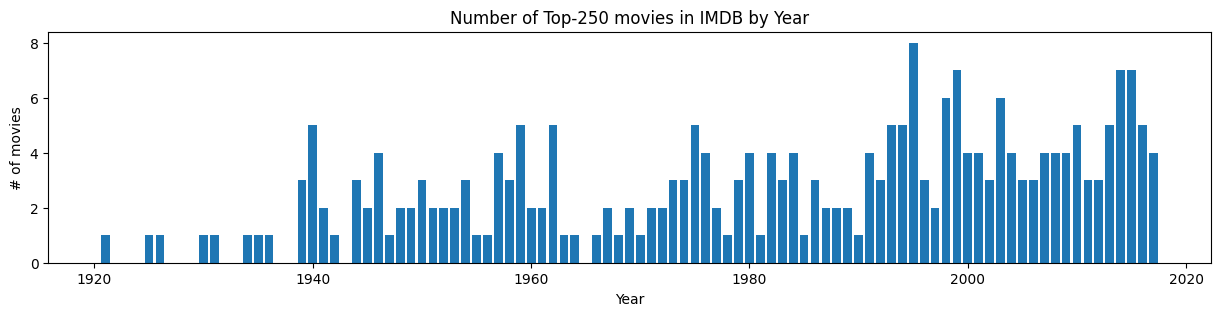

In [62]:
plt.figure(figsize=(15,3))                 # this adjusts the size of the figure displayed
plt.bar(vcis.index, vcis)         # this plots the bar plot, first parameter: x-axis values, second: y-axis values
plt.xlabel('Year')                         # label on x axis 
plt.ylabel('# of movies')                  # label on y axis
plt.title('Number of Top-250 movies in IMDB by Year')      # title of figure
plt.show()                                 # this line is necessary to display out the entire figure

Let's try it on Seaborn as well:

In [63]:
import seaborn as sns

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


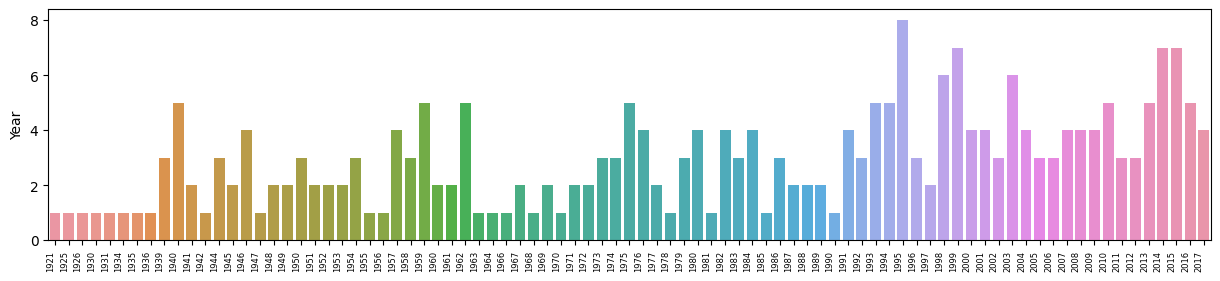

In [64]:
plt.figure(figsize=(15,3))  
ax = sns.barplot(vcis.index, vcis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=6)
plt.show()

> **Note**: You may think that it would be easier to just search for these answers directly from the data file (csv), but think of the case where the data would be very large and it may be challenging to search manually. Doing this in code also allows us to write scripts or interfaces with applications and services.

### Grouping

Grouping is the next concept that we can apply to data. It is intuitive (almost human nature) to put ideas and concepts into groups when there is an 'overload' of data that we can digest at one go. When data is big, it is difficult to examine it thoroughly to form conclusions based on the entire data. For example, even when describing data with statistics, it can sometimes be misleading or inaccurate to simply take the mean of the entire data, unless of course we intend to take the mean for some purpose/task such as normalization. It gives a better context if we were to take the mean of smaller, distinct groups so that we can summarise the behavior of different groups within the same data. 

Pandas has a powerful `groupby` function to do just that.

In [71]:
movies.groupby('Production')

Now, this is incomplete. The object has been created but we also need to specify *how* the grouping is to be executed. Think of it this way: If a group contains 10 data entries, the 10 data entries should be summarised into a single value so that the new DataFrame contains this value representing that particular group.

Let's choose the action to be the mean or average.

In [72]:
movies.groupby('Production').mean()

,Year,Metascore,imdbRating,tomatoMeter,tomatoImage,tomatoRating,tomatoReviews,tomatoFresh,tomatoRotten,tomatoConsensus,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,Response
Production,,,,,,,,,,,,,,
20th Century Fox,1988.533333,75.25,8.220000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
20th Century Fox Film Corporat,1986.000000,87.00,8.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
20th Century Fox Film Corporation,1972.000000,NaN,8.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Almi Cinema 5,1975.000000,93.00,8.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Anchor Bay Entertainment,1976.000000,NaN,8.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Warner Bros. Pictures/Legendary,2008.000000,82.00,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Warner Bros. Pictures/Village Roadshow,2008.000000,72.00,8.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Warner Home Video,1967.000000,NaN,8.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [75]:
movies.groupby("Year").mean().imdbRating.to_frame()

,imdbRating
Year,
1921,8.300000
1925,8.200000
1926,8.200000
1930,8.100000
1931,8.600000
...,...
2013,8.100000
2014,8.228571
2015,8.100000


And so we have applied mean on these groups. Some columns make sense after applying mean, some don't. The mean year does not really give us anything informative. The mean ratings do. Notice that when we applied `mean()`, again only the numeric data is left. Let's trim the Dataframe further...

In [73]:
gbp = movies.groupby('Production').mean()
gbp[["Metascore", "imdbRating"]]         # take only these 2 columns

,Metascore,imdbRating
Production,,
20th Century Fox,75.25,8.220000
20th Century Fox Film Corporat,87.00,8.400000
20th Century Fox Film Corporation,NaN,8.100000
Almi Cinema 5,93.00,8.300000
Anchor Bay Entertainment,NaN,8.300000
...,...,...
Warner Bros. Pictures/Legendary,82.00,9.000000
Warner Bros. Pictures/Village Roadshow,72.00,8.200000
Warner Home Video,NaN,8.166667


To get it sorted, append some code *after* it...   

> Pandas is very powerful, if you want to do something after your existing line of code, keep adding code behind it. Most of the time, it works!

In [76]:
gbp[["Metascore", "imdbRating"]].sort_values('imdbRating', ascending=False)

,Metascore,imdbRating
Production,,
Warner Bros. Pictures/Legendary,82.000000,9.000000
Criterion Collection,96.000000,8.700000
Twentieth Century Fox,67.000000,8.600000
Liberty Films,89.000000,8.600000
New Line Cinema,79.666667,8.583333
...,...,...
Cinedigm,82.000000,8.000000
Dimension Films,74.000000,8.000000
Fox,NaN,8.000000


We can also calculate more than one type of value per group. For instance, we can calculate the min and max of each group:

In [77]:
movies.groupby('Production').agg(['min', 'max'])

C:\Users\USER\AppData\Local\Temp/ipykernel_6272/49787837.py:1: FutureWarning: ['Released', 'Writer', 'Awards', 'DVD', 'BoxOffice', 'Website'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  movies.groupby('Production').agg(['min', 'max'])


Title  \
                                                                    min   
Production                                                                
20th Century Fox                                                  Alien   
20th Century Fox Film Corporat                                   Aliens   
20th Century Fox Film Corporation                                Sleuth   
Almi Cinema 5                           Monty Python and the Holy Grail   
Anchor Bay Entertainment                                    The Message   
...                                                                 ...   
Warner Bros. Pictures/Legendary                         The Dark Knight   
Warner Bros. Pictures/Village Roadshow                      Gran Torino   
Warner Home Video                           Once Upon a Time in America   
Warner Independent Pictures                               Before Sunset   
Xenon                                                         Rio Bravo   

                                                                         Year  \
                                                                    max   min   
Production                                                                      
20th Century Fox                                     Young Frankenstein  1944   
20th Century Fox Film Corporat                                   Aliens  1986   
20th Century Fox Film Corporation                                Sleuth  1972   
Almi Cinema 5                           Monty Python and the Holy Grail  1975   
Anchor Bay Entertainment                                    The Message  1976   
...                                                                 ...   ...   
Warner Bros. Pictures/Legendary                         The Dark Knight  2008   
Warner Bros. Pictures/Village Roadshow                      Gran Torino  2008   
Warner Home Video                       Who's Afraid of Virginia Woolf?  1951   
Warner Independent Pictures                               Before Sunset  2004   
Xenon                                                         Rio Bravo  1959   

                                                  Rated             Runtime  \
                                         max        min        max      min   
Production                                                                    
20th Century Fox                        2017   APPROVED          R  106 min   
20th Century Fox Film Corporat          1986          R          R  137 min   
20th Century Fox Film Corporation       1972         PG         PG  138 min   
Almi Cinema 5                           1975         PG         PG   91 min   
Anchor Bay Entertainment                1976         PG         PG  177 min   
...                                      ...        ...        ...      ...   
Warner Bros. Pictures/Legendary         2008      PG-13      PG-13  152 min   
Warner Bros. Pictures/Village Roadshow  2008          R          R  116 min   
Warner Home Video                       1984         PG      TV-MA  101 min   
Warner Independent Pictures             2004          R          R   80 min   
Xenon                                   1959  NOT RATED  NOT RATED  141 min   

                                                                       Genre  \
                                            max                          min   
Production                                                                     
20th Century Fox                         98 min    Action, Adventure, Comedy   
20th Century Fox Film Corporat          137 min    Action, Adventure, Sci-Fi   
20th Century Fox Film Corporation       138 min            Mystery, Thriller   
Almi Cinema 5                            91 min   Adventure, Comedy, Fantasy   
Anchor Bay Entertainment                177 min  Adventure, Biography, Drama   
...                                         ...                          ...   
Warner Bros. Pictures/Legendary         152 min      

Oh well, it did what we ask it to do! Each column has now min and max calculated. Now, this is looking a bit silly and off track. We are only interested in the min and max of imdbRating, not everything. 

Pandas allows *column names* to be used as property fields. Watch how `imdbRating` is used as a property field.

In [78]:
movies.groupby('Production').imdbRating.agg(['min', 'max'])

,min,max
Production,,
20th Century Fox,8.0,8.8
20th Century Fox Film Corporat,8.4,8.4
20th Century Fox Film Corporation,8.1,8.1
Almi Cinema 5,8.3,8.3
Anchor Bay Entertainment,8.3,8.3
...,...,...
Warner Bros. Pictures/Legendary,9.0,9.0
Warner Bros. Pictures/Village Roadshow,8.2,8.2
Warner Home Video,8.0,8.4


`groupby` can also perform multi-level grouping, where we can first group by one criteria (column), and then for each of these groups, further group based on another criteria (column).

In [79]:
gbpr = movies.groupby(['Production', 'Rated']).imdbRating.agg('mean')
gbpr

Production                      Rated    
20th Century Fox                APPROVED     8.200
                                PG           8.225
                                PG-13        8.000
                                R            8.250
20th Century Fox Film Corporat  R            8.400
                                             ...  
Warner Home Video               PG           8.000
                                R            8.400
                                TV-MA        8.100
Warner Independent Pictures     R            8.000
Xenon                           NOT RATED    8.000
Name: imdbRating, Length: 140, dtype: float64